In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [5]:
# Load data
crop = pd.read_csv("Crop_recommendation.csv")

In [6]:
# Data overview
print(crop.head())
print(crop.shape)
print(crop.info())
print(crop.describe())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

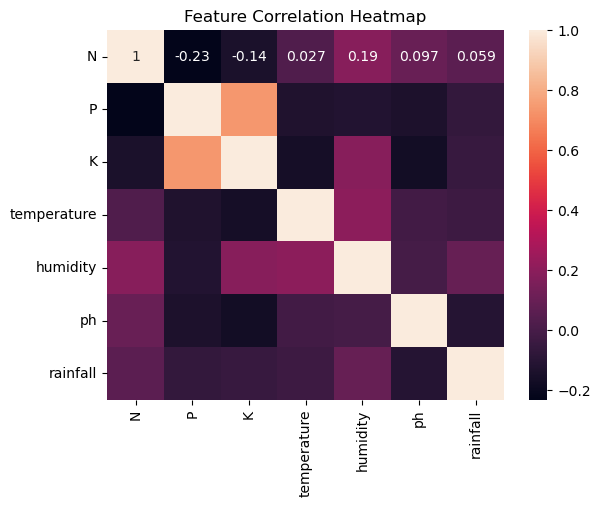

In [7]:
# Correlation heatmap
sns.heatmap(crop.select_dtypes(include=['number']).corr(), annot=True, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# Value counts for labels
print(crop['label'].value_counts())

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


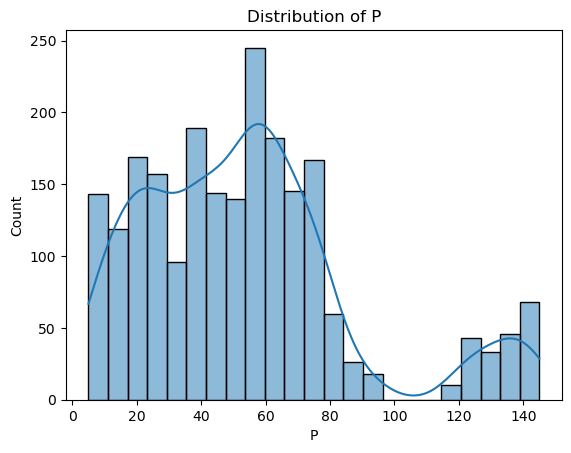

In [9]:
# Fixing the distplot deprecation issue
sns.histplot(crop['P'], kde=True)
plt.title("Distribution of P")
plt.show()

C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


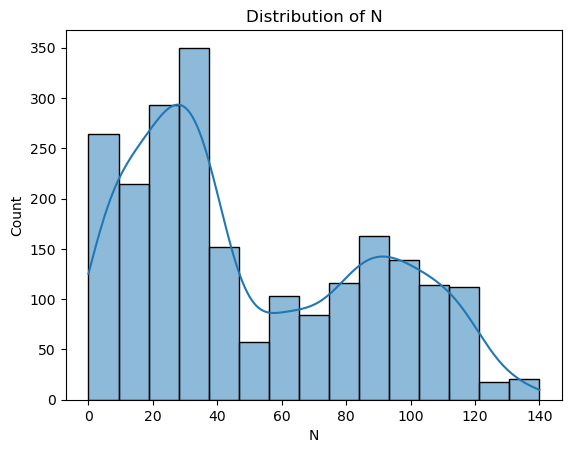

In [10]:
sns.histplot(crop['N'], kde=True)
plt.title("Distribution of N")
plt.show()

In [11]:
# Encoding label column
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5,
    'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10,
    'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15,
    'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19,
    'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}

In [12]:
crop['label'] = crop['label'].map(crop_dict)

In [13]:
# Splitting data into features and target
X = crop.drop('label', axis=1)
y = crop['label']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Scaling features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Training multiple models and evaluating accuracy
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(algorithm="SAMME")  # Fixing warning
}


In [17]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score:.4f}")

LogisticRegression model with accuracy: 0.9636
GaussianNB model with accuracy: 0.9955
SVC model with accuracy: 0.9682
KNeighborsClassifier model with accuracy: 0.9591
DecisionTreeClassifier model with accuracy: 0.9864
ExtraTreeClassifier model with accuracy: 0.8727
RandomForestClassifier model with accuracy: 0.9932
BaggingClassifier model with accuracy: 0.9864
GradientBoostingClassifier model with accuracy: 0.9818
AdaBoostClassifier model with accuracy: 0.1455


In [18]:
# Selecting the best model (RandomForestClassifier based on previous accuracy)
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
print("RandomForestClassifier accuracy:", accuracy_score(y_test, y_pred))

RandomForestClassifier accuracy: 0.9931818181818182


In [23]:
inv_crop_dict = {v: k for k, v in crop_dict.items()}


In [19]:
# Recommendation function
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_features = sc.transform(features)  # Use fitted StandardScaler
    prediction = randclf.predict(scaled_features)
    return prediction[0]

In [20]:
# Example usage of recommendation function
result = recommendation(90, 42, 43, 20.8, 82.0, 6.5, 202.9)
crop_name = {v: k for k, v in crop_dict.items()}[result]
print(f"Recommended Crop: {crop_name}")

Recommended Crop: rice


C:\Users\Pallavi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
import pickle
# ---- SAVE MODEL AND SCALER ----
with open('random_forest.pkl', 'wb') as model_file:
    pickle.dump(randclf, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

with open('crop_dict.pkl', 'wb') as dict_file:
    pickle.dump(inv_crop_dict, dict_file)

print("Model, scaler, and crop dictionary saved!")

# ---- Recommendation Function ----
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    with open('random_forest.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    
    with open('scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
    
    with open('crop_dict.pkl', 'rb') as dict_file:
        crop_dict = pickle.load(dict_file)
    
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_features = scaler.transform(features)
    prediction = model.predict(scaled_features)[0]
    crop = crop_dict[prediction]
    
    return crop

# Example usage
result = recommendation(90, 42, 43, 20.8, 82.0, 6.5, 202.9)
print(f"Recommended Crop: {result}")

Model, scaler, and crop dictionary saved!
Recommended Crop: rice


C:\Users\Pallavi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
